In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aqi-dataset/aqi.csv


# **Loading the dataset**

In [2]:
df = pd.read_csv('../input/aqi-dataset/aqi.csv')

In [3]:
df.head()

,state,city,station,date,time,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI,Predominant_Parameter
0,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-01-2020,10:00:00,68,64,17,4,28,31,40,68,PM2.5
1,Andhra_Pradesh,Rajamahendravaram,"Anand Kala Kshetram, Rajamahendravaram - APPCB",03-01-2020,10:00:00,67,70,23,2,13,49,77,77,OZONE
2,Andhra_Pradesh,Tirupati,"Tirumala, Tirupati - APPCB",03-01-2020,10:00:00,32,64,26,5,6,19,16,32,PM2.5
3,Andhra_Pradesh,Visakhapatnam,"GVM Corporation, Visakhapatnam - APPCB",03-01-2020,10:00:00,93,93,31,3,9,57,61,93,PM10
4,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-01-2020,06:00:00,60,55,20,5,18,29,53,60,PM2.5


# **Correlation Between Air pollutants and AQI**

In [4]:
df[["PM2.5","PM10","NO2","NH3","SO2","CO","OZONE","AQI"]].head()

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
0,68,64,17,4,28,31,40,68
1,67,70,23,2,13,49,77,77
2,32,64,26,5,6,19,16,32
3,93,93,31,3,9,57,61,93
4,60,55,20,5,18,29,53,60


In [5]:
df[["PM2.5","PM10","NO2","NH3","SO2","CO","OZONE","AQI"]].corr(method='pearson')

,PM2.5,PM10,NO2,NH3,SO2,CO,OZONE,AQI
PM2.5,1.000000,0.847821,0.452296,0.514462,0.127736,0.349025,-0.131209,0.985440
PM10,0.847821,1.000000,0.507776,0.501298,0.099759,0.330761,-0.158430,0.872710
NO2,0.452296,0.507776,1.000000,0.391747,0.027716,0.149404,-0.113338,0.463397
NH3,0.514462,0.501298,0.391747,1.000000,0.043533,0.209216,-0.228292,0.519951
SO2,0.127736,0.099759,0.027716,0.043533,1.000000,0.087520,0.023599,0.125297
CO,0.349025,0.330761,0.149404,0.209216,0.087520,1.000000,-0.144244,0.375208
OZONE,-0.131209,-0.158430,-0.113338,-0.228292,0.023599,-0.144244,1.000000,-0.137347
AQI,0.985440,0.872710,0.463397,0.519951,0.125297,0.375208,-0.137347,1.000000


## **Positive Correlation between PM2.5,PM10 and AQI**

<AxesSubplot:xlabel='PM2.5', ylabel='AQI'>

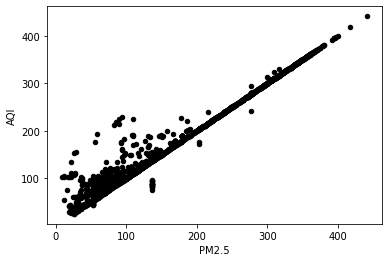

In [6]:
df.plot(x="PM2.5", y="AQI", kind="scatter",color="black")

<AxesSubplot:xlabel='PM10', ylabel='AQI'>

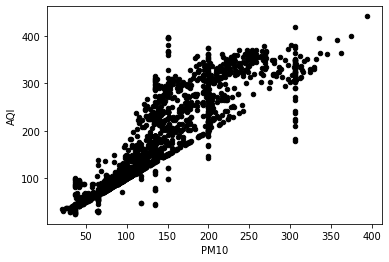

In [7]:
df.plot(x="PM10", y="AQI", kind="scatter",color="black")

## **Negative Correlation between OZONE and AQI**

<AxesSubplot:xlabel='OZONE', ylabel='AQI'>

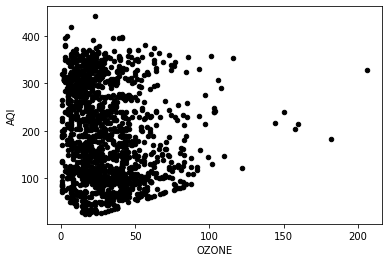

In [8]:
df.plot(x="OZONE", y="AQI", kind="scatter",color="black")

# **Data pre-processing**

In [9]:
x1 = df.iloc[:,:12].values
z1 = pd.DataFrame(x1)

y1 = df.iloc[:,12:13].values
z2 = pd.DataFrame(y1)

In [10]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
x_new1 = pd.DataFrame(ohe.fit_transform(x1[:,[0]]).toarray()) #state
x_new2 = pd.DataFrame(ohe.fit_transform(x1[:,[1]]).toarray()) #city
x_new3 = pd.DataFrame(ohe.fit_transform(x1[:,[2]]).toarray()) #station

feature_set = pd.concat([x_new1,x_new2,x_new3,pd.DataFrame(x1[:,5:12])],axis=1,sort=False)

# **Splitting training and testing data**

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

x_train,x_test,y_train,y_test = train_test_split(feature_set,y1,test_size=0.25,random_state=0)

# **Prediction using regression models**

In [12]:
# multiple linear regression model
mreg = LinearRegression()
mreg.fit(x_train,y_train)

mlr_y_predict = mreg.predict(x_test)


In [13]:
# polynomial regression model
# degree = 2

poly_reg = PolynomialFeatures(degree = 2)
preg = LinearRegression()
pf = poly_reg.fit_transform(x_train)
preg.fit(pf,y_train)
pr_y_predict = preg.predict(poly_reg.fit_transform(x_test))

In [14]:
# decision tree regression model

dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)

dt_y_predict = dec_tree.predict(x_test)

In [15]:
# random forest regression model
# random forest with 500 trees

rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)

rt_y_predict = rt_reg.predict(x_test)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


In [16]:
# support vector regression model

# --- feature scaling the paramenters for better results ---
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x_train_svr = sc_x.fit_transform(x_train)
y_train_svr = sc_y.fit_transform(y_train)

svr_reg = SVR()
svr_reg.fit(x_train_svr,y_train_svr)

svr_y_predict = sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_test)))

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [17]:
from math import sqrt
from sklearn import metrics

def rmsle(real, predicted):
    sum=0.0
    for x in range(len(predicted)):
        if predicted[x]<0 or real[x]<0:
            continue
        p = np.log(predicted[x]+1)
        r = np.log(real[x]+1)
        sum = sum + (p - r)**2
    return ((sum/len(predicted))**0.5)[0]

# **Performance Evaluation of regression models**

In [18]:
#----- multiple linear regresion -------
rmse_mlr = sqrt(metrics.mean_squared_error(y_test, mlr_y_predict))
mae_mlr = metrics.mean_absolute_error(y_test, mlr_y_predict)
r2_mlr = metrics.r2_score(y_test,mlr_y_predict)
rmsle_mlr = rmsle(y_test,mlr_y_predict)

#----- polynomial regression ------------ 
rmse_pr = sqrt(metrics.mean_squared_error(y_test, pr_y_predict))
mae_pr = metrics.mean_absolute_error(y_test, pr_y_predict)
r2_pr = metrics.r2_score(y_test,pr_y_predict)
rmsle_pr = rmsle(y_test,pr_y_predict)

#----- decision tree regression ---------
rmse_dt = sqrt(metrics.mean_squared_error(y_test, dt_y_predict))
mae_dt = metrics.mean_absolute_error(y_test, dt_y_predict)
r2_dt = metrics.r2_score(y_test,dt_y_predict)
rmsle_dt = rmsle(y_test,dt_y_predict)

#----- random forest regression ---------
rmse_rt = sqrt(metrics.mean_squared_error(y_test, rt_y_predict))
mae_rt = metrics.mean_absolute_error(y_test, rt_y_predict)
r2_rt = metrics.r2_score(y_test,rt_y_predict)
rmsle_rt = rmsle(y_test,rt_y_predict)

#----- support vextor regression --------
rmse_svr = sqrt(metrics.mean_squared_error(y_test, svr_y_predict))
mae_svr = metrics.mean_absolute_error(y_test, svr_y_predict)
r2_svr = metrics.r2_score(y_test,svr_y_predict)
rmsle_svr = rmsle(y_test,svr_y_predict)


In [19]:
# ---- MLR ------
mlr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, mreg.predict(x_train)))
mlr_ytp_mae = metrics.mean_absolute_error(y_train, mreg.predict(x_train))
mlr_ytp_r2 = metrics.r2_score(y_train, mreg.predict(x_train))
m1 = mreg.predict(x_train)
mlr_ytp_rmsle = rmsle(y_train, m1)
#------ polynomial regression ---------
pr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, preg.predict(poly_reg.fit_transform(x_train))))
pr_ytp_mae = metrics.mean_absolute_error(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_r2 = metrics.r2_score(y_train, preg.predict(poly_reg.fit_transform(x_train)))
pr_ytp_rmsle = rmsle(y_train, preg.predict(poly_reg.fit_transform(x_train)))

#mxp = preg.predict(poly_reg.fit_transform(x_train))

# ----- decision tree reg ------
dt_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, dec_tree.predict(x_train)))
dt_ytp_mae = metrics.mean_absolute_error(y_train, dec_tree.predict(x_train))
dt_ytp_r2 = metrics.r2_score(y_train, dec_tree.predict(x_train))
dt_ytp_rmsle = rmsle(y_train, dec_tree.predict(x_train))

# ----- random forest reg -----
rf_ytp_rmse = sqrt(metrics.mean_squared_error(y_train, rt_reg.predict(x_train)))
rf_ytp_mae = metrics.mean_absolute_error(y_train, rt_reg.predict(x_train))
rf_ytp_r2 = metrics.r2_score(y_train, rt_reg.predict(x_train))
rf_ytp_rmsle = rmsle(y_train, rt_reg.predict(x_train))

# ----- svr -----
svr_ytp_rmse = sqrt(metrics.mean_squared_error(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train)))))
svr_ytp_mae = metrics.mean_absolute_error(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train))))
svr_ytp_r2 = metrics.r2_score(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train))))
svr_ytp_rmsle = rmsle(y_train,sc_y.inverse_transform(svr_reg.predict(sc_x.transform(x_train))))


In [20]:
print("evaluating on training data:")
print("models\tR^2\tRMSE\tMAE\tRMSLE")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(mlr_ytp_r2,mlr_ytp_rmse,mlr_ytp_mae,mlr_ytp_rmsle))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(pr_ytp_r2,pr_ytp_rmse,pr_ytp_mae,pr_ytp_rmsle))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(dt_ytp_r2,dt_ytp_rmse,dt_ytp_mae,dt_ytp_rmsle))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(rf_ytp_r2,rf_ytp_rmse,rf_ytp_mae,rf_ytp_rmsle))
print("SVR\t{0:.4f}\t{1:.3f}\t{2:.3f}\t{3:.4f}".format(svr_ytp_r2,svr_ytp_rmse,svr_ytp_mae,svr_ytp_rmsle))

print("evaluating on testing data:")
print("models\tR^2\tRMSE\tMAE\tRMSLE")
print("MLR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_mlr,rmse_mlr,mae_mlr,rmsle_mlr))
print("PR\t{0:.2f}\t{1:.2f}\t{2:.3f}\t{3:.4f}".format(r2_pr,rmse_pr,mae_pr,rmsle_pr))
print("DTR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_dt,rmse_dt,mae_dt,rmsle_dt))
print("RFR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_rt,rmse_rt,mae_rt,rmsle_rt))
print("SVR\t{0:.4f}\t{1:.4f}\t{2:.4f}\t{3:.4f}".format(r2_svr,rmse_svr,mae_svr,rmsle_svr))

evaluating on training data:
models	R^2	RMSE	MAE	RMSLE
MLR	0.9965	5.9334	3.2934	0.0595
PR	1.00	0.09	0.018	0.0012
DTR	1.0000	0.0000	0.0000	0.0000
RFR	0.9996	2.0237	0.7106	0.0195
SVR	0.9568	20.917	14.499	0.1363
evaluating on testing data:
models	R^2	RMSE	MAE	RMSLE
MLR	0.9965	5.4977	3.4798	0.0518
PR	-4.14	211.88	81.586	0.4639
DTR	0.9955	6.2370	2.3546	0.0563
RFR	0.9983	3.8577	1.7016	0.0423
SVR	0.9165	27.0026	19.0723	0.1686


# **Visualization of  predicted values from regression models**

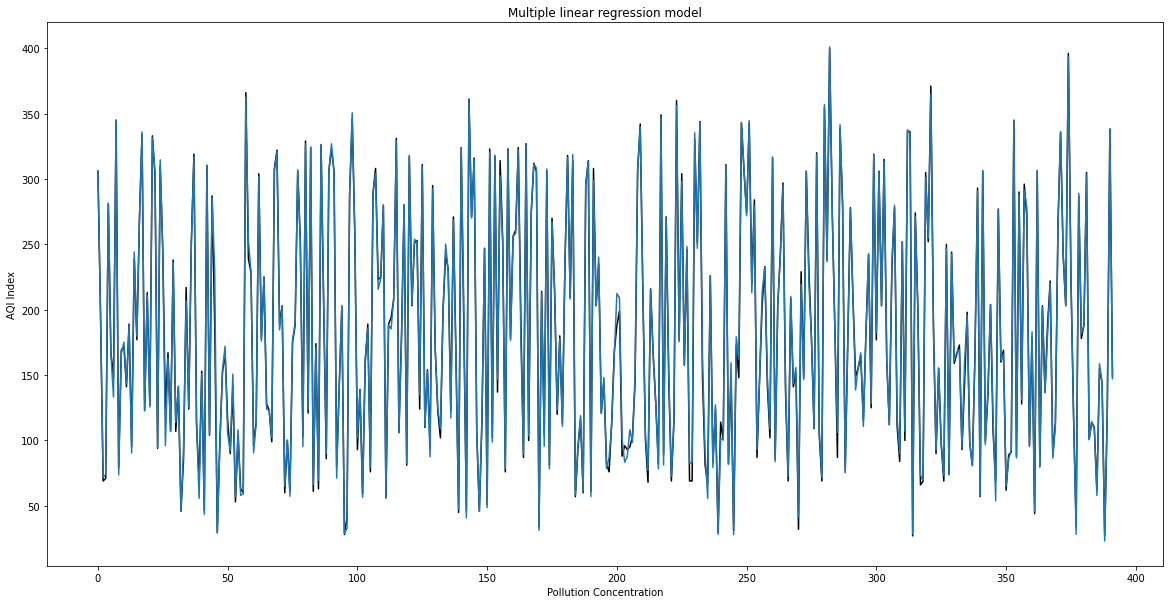

In [29]:
import matplotlib.pyplot as plot
plot.figure(figsize=(20,10)) 
plot.plot(y_test,color="black")
plot.plot(mlr_y_predict)
plot.title('Multiple linear regression model')
plot.xlabel('Pollution Concentration')
plot.ylabel('AQI Index')
plot.show()

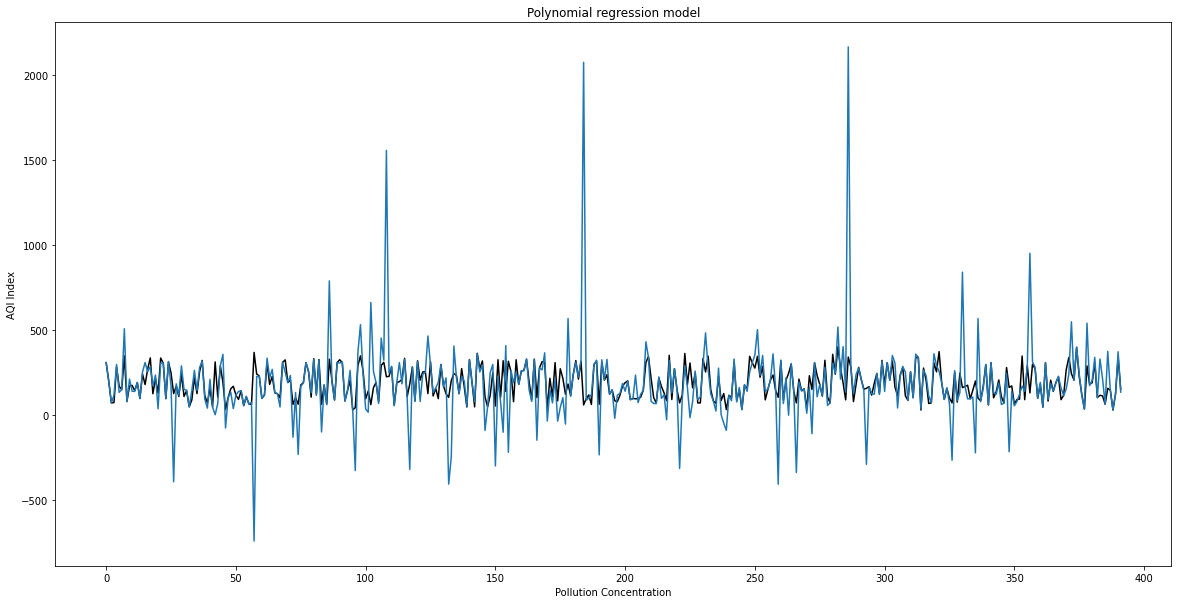

In [22]:
import matplotlib.pyplot as plot
plot.figure(figsize=(20,10)) 
plot.plot(y_test,color="black")
plot.plot(pr_y_predict)
plot.title('Polynomial regression model')
plot.xlabel('Pollution Concentration')
plot.ylabel('AQI Index')
plot.show()

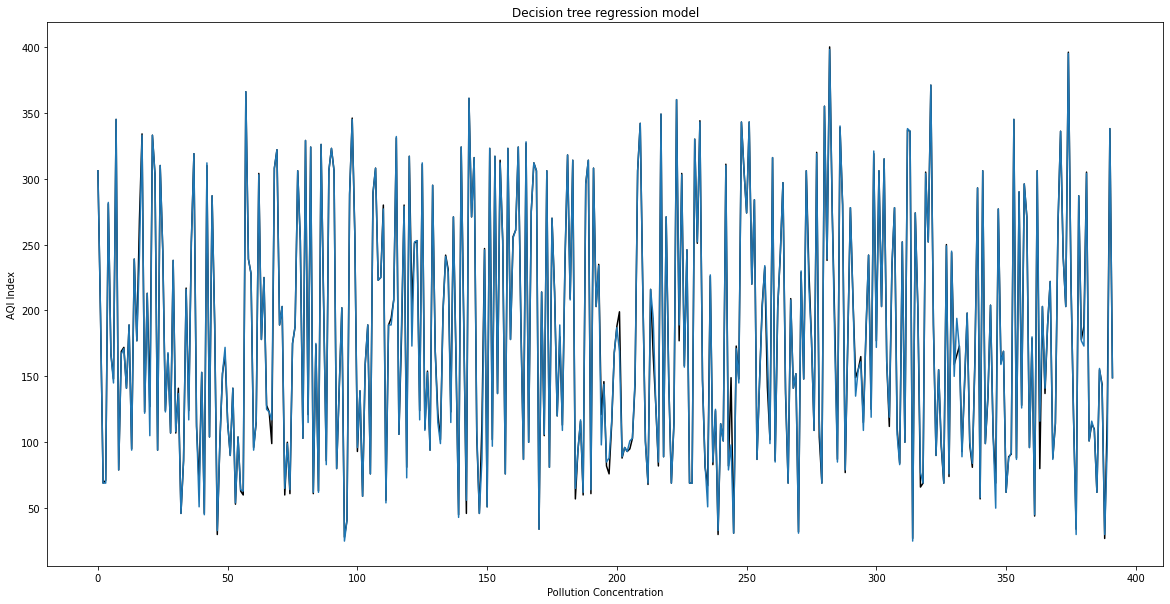

In [23]:
import matplotlib.pyplot as plot
plot.figure(figsize=(20,10)) 
plot.plot(y_test,color="black")
plot.plot(dt_y_predict)
plot.title('Decision tree regression model')
plot.xlabel('Pollution Concentration')
plot.ylabel('AQI Index')
plot.show()

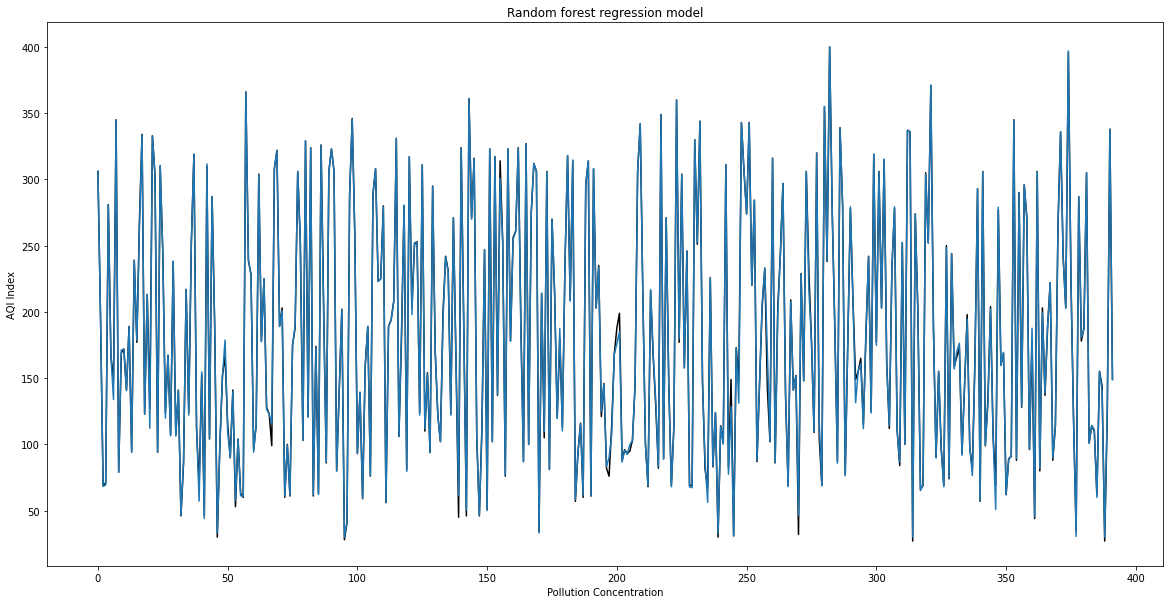

In [24]:
import matplotlib.pyplot as plot
plot.figure(figsize=(20,10)) 
plot.plot(y_test,color="black")
plot.plot(rt_y_predict)
plot.title('Random forest regression model')
plot.xlabel('Pollution Concentration')
plot.ylabel('AQI Index')
plot.show()

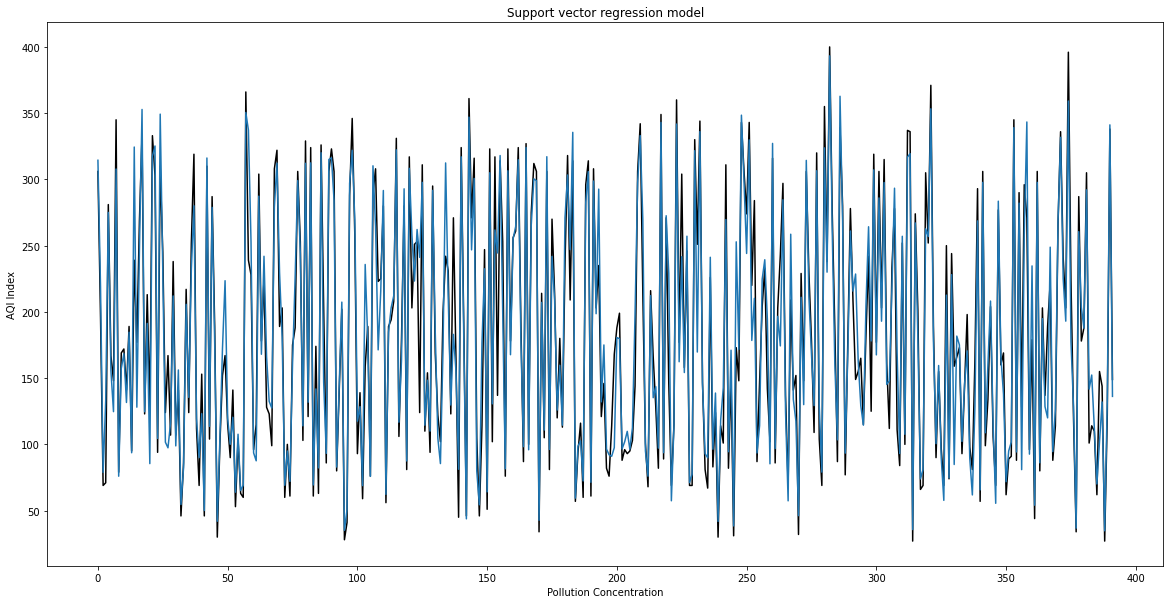

In [25]:
import matplotlib.pyplot as plot
plot.figure(figsize=(20,10)) 
plot.plot(y_test,color="black")
plot.plot(svr_y_predict)
plot.title('Support vector regression model')
plot.xlabel('Pollution Concentration')
plot.ylabel('AQI Index')
plot.show()